In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [2]:
def within_bound(lat, lng, country_shp):
    """
    Check if a POI with latitude and longitude pair falls within the study area.
    """
    return (Point(lng, lat).within(country_shp.loc[0, 'geometry'])) or (Point(lng, lat).within(country_shp.loc[1, 'geometry'])) or (Point(lng, lat).within(country_shp.loc[2, 'geometry'])) or (Point(lng, lat).within(country_shp.loc[3, 'geometry'])) or (Point(lng, lat).within(country_shp.loc[4, 'geometry']))


def remove_outofbound(data, country_shp):
    retained_index = [i for i in range(len(data)) if
                      within_bound(data.loc[i, 'geometry.lat'],
                                   data.loc[i, 'geometry.lng'], country_shp)]
    return data.iloc[retained_index].reset_index(drop=True)


def plot_distribution(data, all_data, data_name):
    print(data_name)
    data = data.set_crs('epsg:4326')
    data = data.to_crs(epsg=3857)
    all_data = all_data.set_crs('epsg:4326')
    all_data = all_data.to_crs(epsg=3857)
    ax = all_data.plot(figsize=(8, 8), alpha=0.0)
    data.plot(figsize=(8, 8), alpha=0.5, ax=ax, color='orangered')
    ctx.add_basemap(ax)
    ax.set_axis_off()
    plt.savefig('../figures/{}.png'.format(data_name), dpi=600)
    plt.show()
    

conflated_data


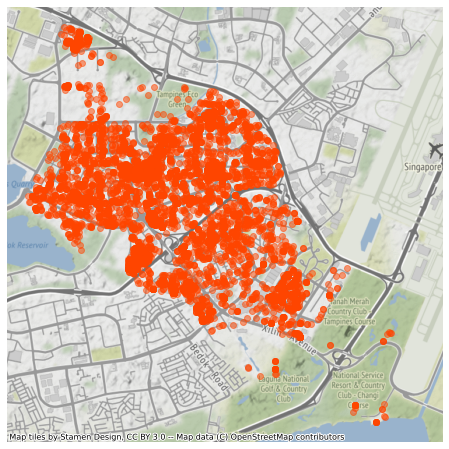

google_data


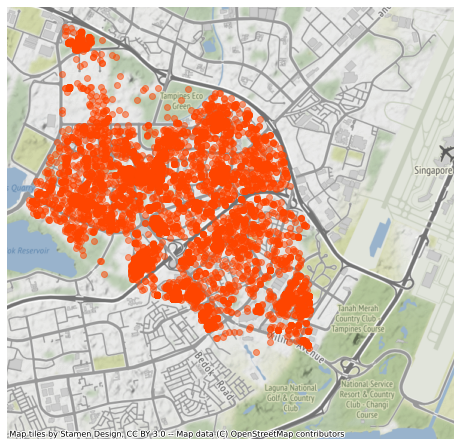

here_data


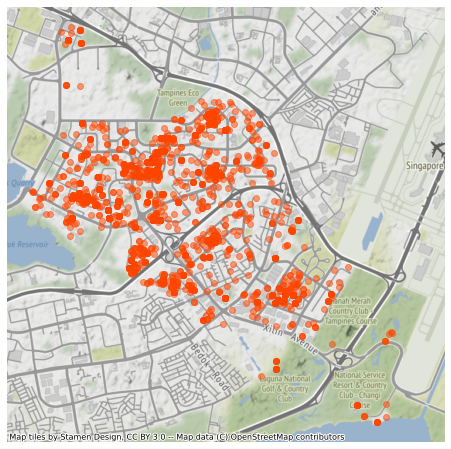

onemap_data


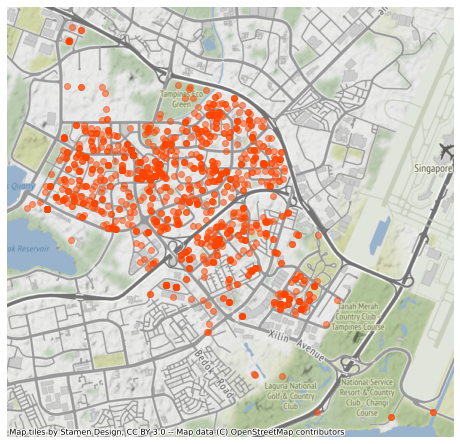

osm_data


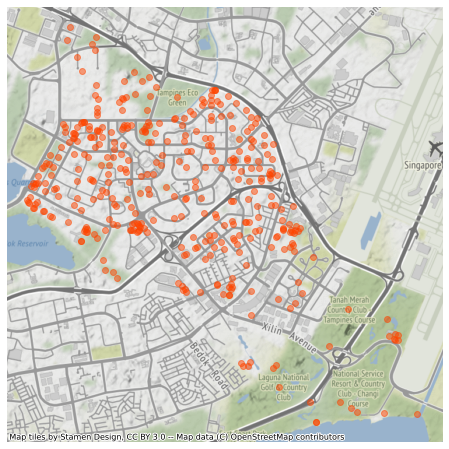

sla_data


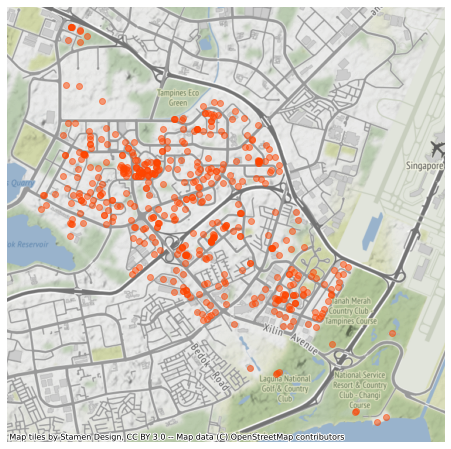

In [4]:
# load data from different sources
conflated_data = pd.read_excel('../data/conflated_data/conflated_data_tampines.xlsx')
google_data = pd.read_excel('../data/googlemap/google_data_tampines.xlsx')
here_data = pd.read_excel('../data/heremap/here_data_tampines.xlsx')
onemap_data = pd.read_excel('../data/onemap/onemap_data_tampines.xlsx')
osm_data = pd.read_excel('../data/osm/osm_data_tampines.xlsx')
sla_data = pd.read_excel('../data/sla/sla_data_tampines.xlsx')

# convert to geopandas
conflated_data = gpd.GeoDataFrame(conflated_data, geometry=gpd.points_from_xy(conflated_data['geometry.lng'], conflated_data['geometry.lat']))
google_data = gpd.GeoDataFrame(google_data, geometry=gpd.points_from_xy(google_data['geometry.lng'], google_data['geometry.lat']))
here_data = gpd.GeoDataFrame(here_data, geometry=gpd.points_from_xy(here_data['geometry.lng'], here_data['geometry.lat']))
onemap_data = gpd.GeoDataFrame(onemap_data, geometry=gpd.points_from_xy(onemap_data['geometry.lng'], onemap_data['geometry.lat']))
osm_data = gpd.GeoDataFrame(osm_data, geometry=gpd.points_from_xy(osm_data['geometry.lng'], osm_data['geometry.lat']))
sla_data = gpd.GeoDataFrame(sla_data, geometry=gpd.points_from_xy(sla_data['geometry.lng'], sla_data['geometry.lat']))

# load study area shapefile
country_shp = gpd.read_file('../data/master-plan-2014-planning-area-boundary-web/master-plan-2014-planning-area-boundary-web-shp/MP14_PLNG_AREA_WEB_PL.shp')
country_shp = country_shp.to_crs(epsg="4326")
country_shp = country_shp[country_shp['PLN_AREA_N'] == 'TAMPINES'].reset_index(drop=True)

# remove out of bound POIs
conflated_data = remove_outofbound(conflated_data, country_shp)
google_data = remove_outofbound(google_data, country_shp)
here_data = remove_outofbound(here_data, country_shp)
onemap_data = remove_outofbound(onemap_data, country_shp)
osm_data = remove_outofbound(osm_data, country_shp)
sla_data = remove_outofbound(sla_data, country_shp)

# remove duplicates
conflated_data.drop_duplicates(subset=['id'], inplace=True, ignore_index=True)
google_data.drop_duplicates(subset=['id'], inplace=True, ignore_index=True)
here_data.drop_duplicates(subset=['id'], inplace=True, ignore_index=True)
onemap_data.drop_duplicates(subset=['id'], inplace=True, ignore_index=True)
osm_data.drop_duplicates(subset=['id'], inplace=True, ignore_index=True)
sla_data.drop_duplicates(subset=['id'], inplace=True, ignore_index=True)

# plot POI distribution
plot_distribution(conflated_data, onemap_data, 'conflated_data')
plot_distribution(google_data, onemap_data, 'google_data')
plot_distribution(here_data, onemap_data, 'here_data')
plot_distribution(onemap_data, onemap_data, 'onemap_data')
plot_distribution(osm_data, onemap_data, 'osm_data')
plot_distribution(sla_data, onemap_data, 'sla_data')